In [1]:
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.mode.chained_assignment = None

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submit = pd.read_csv('gender_submission.csv')

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 有空值需要處理

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 將Test 與 Train 資料結合

In [8]:
data = train.append(test)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
data.reset_index(inplace=True, drop=True)

In [10]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Data Analysis 資料分析

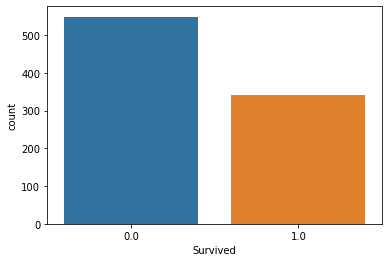

In [11]:
sns.countplot(data['Survived'])

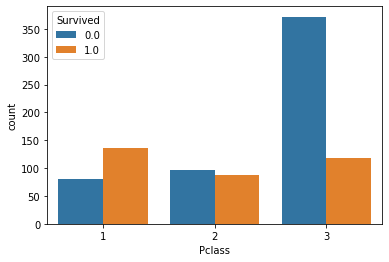

In [12]:
#以pclass為底觀察Surived
sns.countplot(data['Pclass'], hue=data['Survived'])

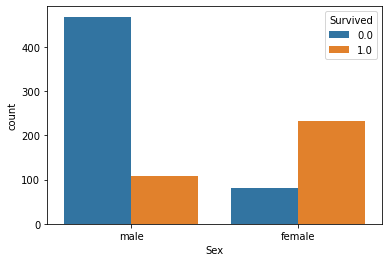

In [13]:
sns.countplot(data['Sex'], hue=data['Survived'])

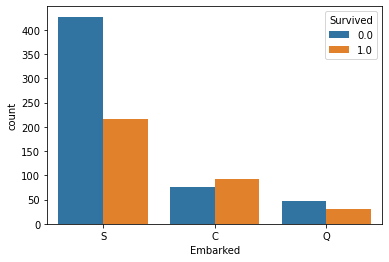

In [14]:
sns.countplot(data['Embarked'], hue=data['Survived'])

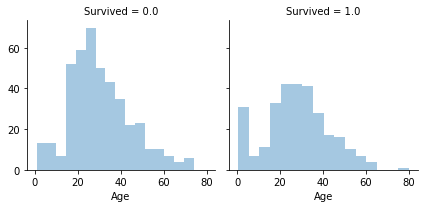

In [15]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

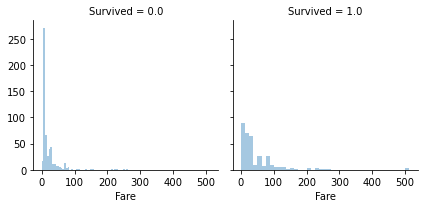

In [16]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

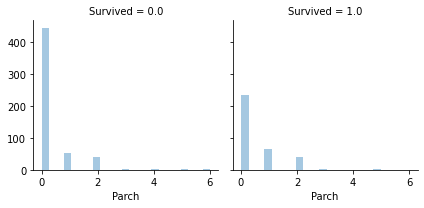

In [17]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Parch', kde=False)

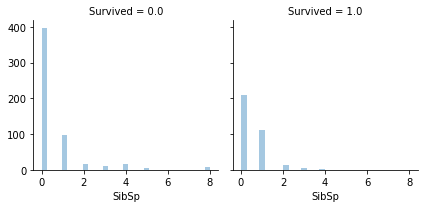

In [18]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'SibSp', kde=False)

In [19]:
data['Family_Size'] = data['Parch'] + data['SibSp']

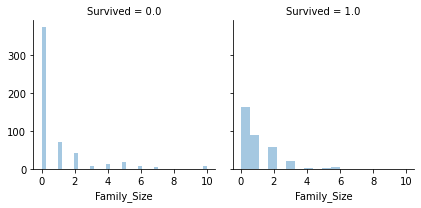

In [20]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Family_Size', kde=False)

# Feature Engineering 特徵工程

In [21]:
#expand=true:切割出來的資料獨立一列
data['Name_split'] = data['Name'].str.split(", ", expand=True)[1]
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Name_split
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr. Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss. Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs. Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr. William Henry


In [22]:
data['Name'].str.split(", ", expand=True).head(3)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina


In [23]:
data['Name_split'].head(3)

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
Name: Name_split, dtype: object

In [24]:
data['Name_split'] = data['Name_split'].str.split(".", expand=True)[0]

In [25]:
data['Name_split'].head(3)

0      Mr
1     Mrs
2    Miss
Name: Name_split, dtype: object

In [26]:
#unique:除去重複元素並排序
data['Name_split'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [27]:
#crosstab:交叉比對，例:用Name_split中的資料比對Sex的人數
#T.style.bachground_gradient:上色
pd.crosstab(data['Name_split'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Name_split,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [28]:
pd.crosstab(data['Name_split'],data['Survived']).T.style.background_gradient(cmap='summer_r')

Name_split,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [29]:
data.groupby(['Name_split'])['Age'].mean()

Name_split
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [30]:
data.groupby(['Name_split','Pclass'])['Age'].mean()

Name_split    Pclass
Capt          1         70.000000
Col           1         54.000000
Don           1         40.000000
Dona          1         39.000000
Dr            1         45.600000
              2         38.500000
Jonkheer      1         38.000000
Lady          1         48.000000
Major         1         48.500000
Master        1          6.984000
              2          2.757273
              3          6.090000
Miss          1         30.338983
              2         20.717083
              3         17.360874
Mlle          1         24.000000
Mme           1         24.000000
Mr            1         41.450758
              2         32.346715
              3         28.318910
Mrs           1         43.208955
              2         33.518519
              3         32.326531
Ms            2         28.000000
              3               NaN
Rev           2         41.250000
Sir           1         49.000000
the Countess  1         33.000000
Name: Age, dtype: float64

In [31]:
data['NewName_Title'] = data['Name_split'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
         ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [32]:
data['NewName_Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [33]:
data.groupby(['NewName_Title'])['Age'].mean()

NewName_Title
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64

In [34]:
data.groupby(['NewName_Title','Pclass'])['Age'].mean()

NewName_Title  Pclass
Master         1          6.984000
               2          2.757273
               3          6.090000
Miss           1         30.131148
               2         20.865714
               3         17.360874
Mr             1         42.241497
               2         32.914966
               3         28.318910
Mrs            1         42.802817
               2         33.518519
               3         32.326531
Name: Age, dtype: float64

In [35]:
pd.crosstab(data['NewName_Title'],data['Sex']).T.style.background_gradient(cmap='summer_r')

NewName_Title,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,1,201
male,61,0,782,0


In [36]:
pd.crosstab(data['NewName_Title'],data['Survived']).T.style.background_gradient(cmap='summer_r')

NewName_Title,Master,Miss,Mr,Mrs
Survived,,,,
0.0,17,55,451,26
1.0,23,130,87,102


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Survived       891 non-null    float64
 2   Pclass         1309 non-null   int64  
 3   Name           1309 non-null   object 
 4   Sex            1309 non-null   object 
 5   Age            1046 non-null   float64
 6   SibSp          1309 non-null   int64  
 7   Parch          1309 non-null   int64  
 8   Ticket         1309 non-null   object 
 9   Fare           1308 non-null   float64
 10  Cabin          295 non-null    object 
 11  Embarked       1307 non-null   object 
 12  Family_Size    1309 non-null   int64  
 13  Name_split     1309 non-null   object 
 14  NewName_Title  1309 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 153.5+ KB


In [38]:
data['Ticket_info']=data['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if not x.isdigit() else 'X')

In [39]:
data['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

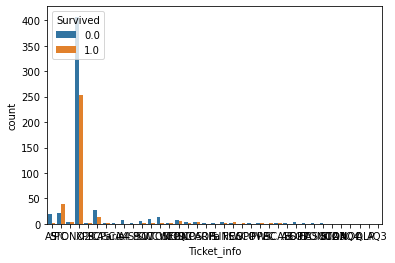

In [40]:
sns.countplot(data['Ticket_info'],hue=data['Survived'])

# Missing Value-embarked、Fare、Age 登船港口（Embarked）只有遺漏少數，我們就直接補上出現次數最多的“ S”，費用（Fare）也只有遺漏額，因此就直接補上最少

In [41]:
#前兩段為顯示所有資料設定法
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
#data['Embarked']

In [42]:
data['Embarked'] = data['Embarked'].fillna('S')

In [43]:
#確認Embarked是否改變用
#data['Embarked']

In [44]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Survived       891 non-null    float64
 2   Pclass         1309 non-null   int64  
 3   Name           1309 non-null   object 
 4   Sex            1309 non-null   object 
 5   Age            1046 non-null   float64
 6   SibSp          1309 non-null   int64  
 7   Parch          1309 non-null   int64  
 8   Ticket         1309 non-null   object 
 9   Fare           1309 non-null   float64
 10  Cabin          295 non-null    object 
 11  Embarked       1309 non-null   object 
 12  Family_Size    1309 non-null   int64  
 13  Name_split     1309 non-null   object 
 14  NewName_Title  1309 non-null   object 
 15  Ticket_info    1309 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 163.8+ KB


# Cabin的資料，只收回最前面的英文字母，剩下的用NoCabin來表

In [46]:
data['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [47]:
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')

In [48]:
data['Cabin'].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

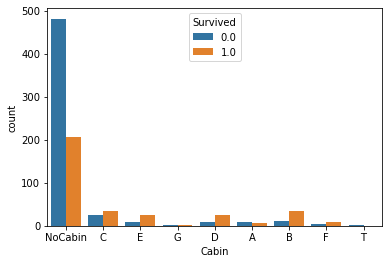

In [49]:
sns.countplot(data['Cabin'], hue=data['Survived'])

# 將類別資料轉為整體

In [50]:
#先確認data['Sex']資料內容
data['Sex']

0         male
1       female
2       female
3       female
4         male
         ...  
1304      male
1305    female
1306      male
1307      male
1308      male
Name: Sex, Length: 1309, dtype: object

In [51]:
#經由此轉換將male與female轉為0,1
data['Sex'] = data['Sex'].astype('category').cat.codes

In [52]:
#確認data['Sex']轉換過後內容
data['Sex']

0       1
1       0
2       0
3       0
4       1
       ..
1304    1
1305    0
1306    1
1307    1
1308    1
Name: Sex, Length: 1309, dtype: int8

In [53]:
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Name_split'] = data['Name_split'].astype('category').cat.codes
data['NewName_Title'] = data['NewName_Title'].astype('category').cat.codes
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Ticket_info'] = data['Ticket_info'].astype('category').cat.codes

# 使用隨機森林來推測年齡

In [54]:
dataAgeNull = data[data["Age"].isnull()]
dataAgeNull

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Name_split,NewName_Title,Ticket_info
5,6,0.0,2,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,7,1,0,12,2,36
17,18,1.0,1,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,7,2,0,12,2,36
19,20,1.0,2,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,7,0,0,13,3,36
26,27,0.0,2,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,7,0,0,12,2,36
28,29,1.0,2,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,7,1,0,9,1,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,2,"Riordan, Miss. Johanna Hannah""""",0,NaN,0,0,334915,7.7208,7,1,0,9,1,36
1301,1302,NaN,2,"Naughton, Miss. Hannah",0,NaN,0,0,365237,7.7500,7,1,0,9,1,36
1304,1305,NaN,2,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,7,2,0,12,2,2
1307,1308,NaN,2,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,7,2,0,12,2,36


In [55]:
dataAgeNotNull = data[data['Age'].notnull()]
dataAgeNotNull

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Name_split,NewName_Title,Ticket_info
0,1,0.0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,2,1,12,2,2
1,2,1.0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,1,13,3,14
2,3,1.0,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,2,0,9,1,31
3,4,1.0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2,1,13,3,36
4,5,0.0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,2,0,12,2,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1301,NaN,2,"Peacock, Miss. Treasteall",0,3.0,1,1,SOTON/O.Q. 3101315,13.7750,7,2,2,9,1,28
1302,1303,NaN,0,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.0,1,0,19928,90.0000,2,1,1,13,3,36
1303,1304,NaN,2,"Henriksson, Miss. Jenny Lovisa",0,28.0,0,0,347086,7.7750,7,2,0,9,1,36
1305,1306,NaN,0,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,2,0,0,3,3,14


In [56]:
remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull["Fare"]-dataAgeNotNull["Fare"].mean())>(4*dataAgeNotNull["Fare"].std()))|
                      (np.abs(dataAgeNotNull["Family_Size"]-dataAgeNotNull["Family_Size"].mean())>(4*dataAgeNotNull["Family_Size"].std()))                     
                     ]

In [57]:
remove_outlier

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Name_split,NewName_Title,Ticket_info
27,28,0.0,0,"Fortune, Mr. Charles Alexander",1,19.0,3,2,19950,263.0000,2,2,5,12,2,36
59,60,0.0,2,"Goodwin, Master. William Frederick",1,11.0,5,2,CA 2144,46.9000,7,2,7,8,0,7
71,72,0.0,2,"Goodwin, Miss. Lillian Amy",0,16.0,5,2,CA 2144,46.9000,7,2,7,9,1,7
88,89,1.0,0,"Fortune, Miss. Mabel Helen",0,23.0,3,2,19950,263.0000,2,2,5,9,1,36
258,259,1.0,0,"Ward, Miss. Anna",0,35.0,0,0,PC 17755,512.3292,7,0,0,9,1,14
311,312,1.0,0,"Ryerson, Miss. Emily Borie",0,18.0,2,2,PC 17608,262.3750,1,0,4,9,1,14
341,342,1.0,0,"Fortune, Miss. Alice Elizabeth",0,24.0,3,2,19950,263.0000,2,2,5,9,1,36
386,387,0.0,2,"Goodwin, Master. Sidney Leonard",1,1.0,5,2,CA 2144,46.9000,7,2,7,8,0,7
438,439,0.0,0,"Fortune, Mr. Mark",1,64.0,1,4,19950,263.0000,2,2,5,12,2,36
480,481,0.0,2,"Goodwin, Master. Harold Victor",1,9.0,5,2,CA 2144,46.9000,7,2,7,8,0,7


In [58]:
rfModel_age = RandomForestRegressor(n_estimators=2000,random_state=42)

In [59]:
rfModel_age

RandomForestRegressor(n_estimators=2000, random_state=42)

In [60]:
ageColumns = ['Embarked' , 'Fare' , 'Pclass' , 'Sex' , 'Family_Size' , 'Name_split' , 'NewName_Title' , 'Cabin' , 'Ticket_info']

In [61]:
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier['Age'])

RandomForestRegressor(n_estimators=2000, random_state=42)

In [62]:
ageNullValues = rfModel_age.predict(X = dataAgeNull[ageColumns])
dataAgeNull.loc[:,'Age'] = ageNullValues
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace=True, drop=True)

In [63]:
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])

In [64]:
dataTrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Name_split', 'NewName_Title', 'Ticket_info'],
      dtype='object')

In [65]:
dataTrain = dataTrain[['Survived', 'Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'Family_Size', 'NewName_Title','Ticket_info','Cabin']]
dataTest = dataTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'NewName_Title','Ticket_info','Cabin']]

In [66]:
dataTrain

,Survived,Age,Embarked,Fare,Pclass,Sex,Family_Size,NewName_Title,Ticket_info,Cabin
263,0.0,22.000000,2,7.2500,2,1,1,2,2,7
264,1.0,38.000000,0,71.2833,0,0,1,3,14,2
265,1.0,26.000000,2,7.9250,2,0,0,1,31,7
266,1.0,35.000000,2,53.1000,0,0,1,3,36,2
267,0.0,35.000000,2,8.0500,2,1,0,2,36,7
...,...,...,...,...,...,...,...,...,...,...
973,0.0,27.000000,2,13.0000,1,1,0,2,36,7
974,1.0,19.000000,2,30.0000,0,0,0,1,36,1
176,0.0,19.099409,2,23.4500,2,0,3,1,34,7
975,1.0,26.000000,0,30.0000,0,1,0,2,36,2


# Model training

In [67]:
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 

rf.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8294


In [68]:
pd.concat((pd.DataFrame(dataTrain.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
4,Sex,0.264997
2,Fare,0.163890
6,NewName_Title,0.152698
0,Age,0.131891
3,Pclass,0.091048
5,Family_Size,0.070839
8,Cabin,0.067029
7,Ticket_info,0.031735
1,Embarked,0.025873


# Submit

In [69]:
rf_res =  rf.predict(dataTest)
submit['Survived'] = rf_res
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit.csv', index= False)

In [70]:
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
